In [42]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9224
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1064 - accuracy: 0.9669
Epoch 3/3
313/313 [==============================] - 0s 707us/step - loss: 0.1018 - accuracy: 0.96790s - loss: 0.1003 - accuracy: 0.96
0.1018078401684761
0.9678999781608582


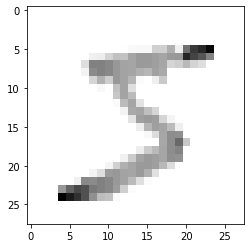

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [43]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [52]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [53]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [54]:
predictions = new_model.predict(x_test)

In [55]:
print(predictions)

[[3.1170979e-09 1.5159834e-08 1.2532792e-06 ... 9.9999750e-01
  3.0069049e-08 1.6623825e-07]
 [2.1480711e-08 2.4449159e-04 9.9974662e-01 ... 1.0154664e-09
  1.7004151e-06 6.0570118e-11]
 [3.8217912e-08 9.9992013e-01 2.0879252e-06 ... 7.0490264e-06
  3.4522316e-05 4.7553485e-06]
 ...
 [6.1787064e-09 3.3381295e-06 5.1386721e-08 ... 6.8179393e-06
  3.1623301e-07 6.1978404e-05]
 [8.4579440e-08 3.4952027e-08 4.2664730e-08 ... 4.5771728e-07
  2.7581229e-04 2.9381812e-07]
 [3.3602927e-08 2.6610536e-10 8.3116741e-10 ... 6.8813267e-12
  1.1654928e-09 4.6262733e-11]]


In [56]:
import numpy as np

print(np.argmax(predictions[0]))

7


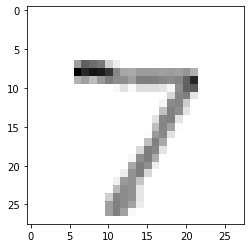

In [57]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()